## Exploratory Data Analysis for scaped BBC data & Kaggle What's Cooking data

Kaggle data can be found [here](https://www.kaggle.com/c/whats-cooking):



In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
bbc_data = pd.read_csv('../data/raw/bbc_scraped.csv', dtype=object).iloc[:,1:] #scraped 4616 rows!
k_data = pd.read_json('../data/external/kaggle_whats_cooking_train.json')

In [74]:
bbc_data.head()

,cuisine,ingredients,recipe
0,american,['25cm/10in sponge (cut from a large bought fl...,American baked cheesecake
1,american,"['175g/6oz plain flour', '1 tsp baking powder'...",American-style pancakes with bacon and maple s...
2,american,"['500g/1lb 2oz sausagemeat', '450g/1lb self-ra...",American style pancakes with sausage
3,american,"['750g/1lb 10oz Bramley apples ', '250g/9oz bl...",Apple and blueberry cobbler
4,american,"['2 free-range eggs, lightly beaten', '80g/2¾o...",Toffee apple muffins


In [71]:
for i in range(5):
    print(bbc_data['ingredients'][i])
    print("-")

['25cm/10in sponge (cut from a large bought flan case)', '200g/7oz caster sugar ', 'finely grated zest of 3 lemons ', '4 tbsp cornflour ', '3 tbsp sultanas, soaked in a bit of bourbon ', '845g/29¾oz full fat soft cream cheese ', '3 medium eggs ', '7.5ml/1½ tsp vanilla essence ', '1 vanilla pod ', 'Jack Daniels to taste or bourbon (optional) ', '375ml/12½fl oz double or single cream ', '10 small bananas ', '25g/1oz butter ', '2 tbsp sugar ', 'caramel sauce or maple syrup ', 'sprig of mint or basil']
-
['175g/6oz plain flour', '1 tsp baking powder', '25g/1oz caster sugar', '2 free-range eggs, separated', '250ml/9fl oz milk', '25g/1oz butter', '12 rashers maple-cured back bacon', 'maple syrup, to serve']
-
['500g/1lb 2oz sausagemeat', '450g/1lb self-raising flour', '1 tsp baking powder', 'pinch of salt', '600ml/20fl oz buttermilk', '3 large free-range eggs, separated', '50g/1¾oz butter, melted, plus extra for frying ', 'maple syrup, to serve']
-
['750g/1lb 10oz Bramley apples ', '250g/9oz

In [77]:
k_data.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [62]:
k_cuisines = list(train['cuisine'].unique())
bbc_cuisines = list(data['cuisine'].unique())

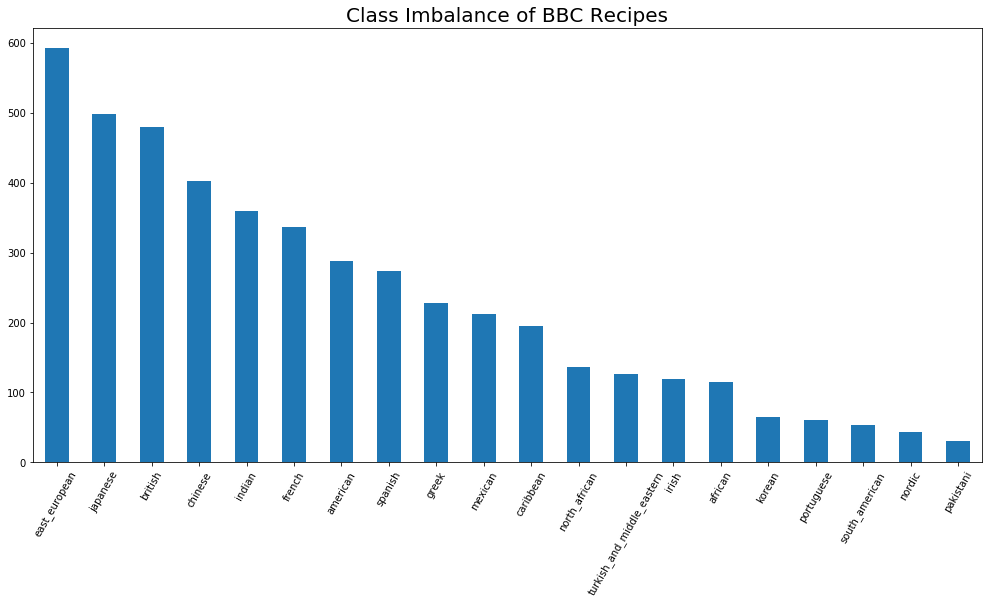

In [72]:
bbc_data['cuisine'].value_counts().plot(kind='bar', figsize=(17,8), rot=60)
plt.title("Class Imbalance of BBC Recipes", fontsize = 20)
plt.show()

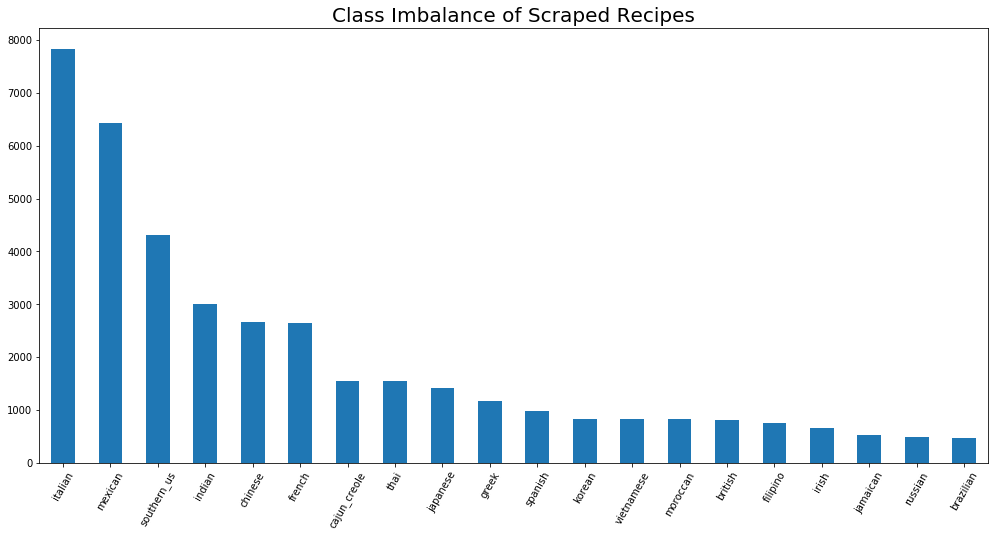

In [67]:
k_data['cuisine'].value_counts().plot(kind='bar', figsize=(17,8), rot=60)
plt.title("Class Imbalance of Scraped Recipes", fontsize = 20)
plt.show()

## Initial insights:
- quite a bit of class imbalance, but it looks like we can combine a number of categories

#### BBC Dataset:
- data set ingredient list in need of pre-processing, need to match Kaggle data set quality before model building
- `pakistani` food has the lowest number of recipes, though controversial, it might make sense to put this category in with the `indian` category.
- `north_african` cuisine can become `moroccan` cuisine, like in the Kaggle dataset

#### Kaggle Dataset:
- abundance of `italian` cuisine, almost 6 times more than most categories, oversample?
- No need for `id` column, this was mainly used for the kaggle competition, no need for it now. 
- `vietnamese` and `thai` can be combined and also added as 

In [57]:
k_cuisines = list(train['cuisine'].unique())
bbc_cuisines = list(data['cuisine'].unique())

In [58]:
for i in k_cuisines:
    if i not in bbc_cuisines:
        print(i)

southern_us
filipino
jamaican
italian
thai
vietnamese
cajun_creole
brazilian
moroccan
russian
